# Example 001: Radar fixed target

In [1]:
import os

os.chdir(r"C:\Users\malth\OneDrive - Aarhus Universitet\Dokumenter\AAU-Studie\10. semester\NEW GIT\MMARS")
print(os.getcwd())  # Prints current working directory

C:\Users\malth\OneDrive - Aarhus Universitet\Dokumenter\AAU-Studie\10. semester\NEW GIT\MMARS


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mmars

## Setting up the radar

In [3]:
radar_model_1 = mmars.FmcwRadar(position=np.array([[0,0]]))
radar_model_1.show_parameters()
radar_model_1.radar_to_target_measures()

[[-0.02336045  0.        ]
 [-0.01557363  0.        ]
 [-0.00778682  0.        ]]
[[-0.00292006  0.        ]
 [-0.00097335  0.        ]
 [ 0.00097335  0.        ]
 [ 0.00292006  0.        ]]
Maximum unambiguous range: 99.93 m
Maximum unambiguous IF frequency: 20.00 MHz
Maximum unambiguous velocity: 37.93 m/s
Maximum unambiguous angle: 90.00 degrees
SNR: 10 dB at 10 m


## Setting up the target

In [4]:
target_model_1 = mmars.Target(start_position=np.array([[0.001,0.001]]), start_velocity=5., T_total=10.)

target_model_1.generate_trajectory(trajectory_type="sinusoidal")

In [5]:
sim = mmars.Simulation(radar_model_1, target_model_1)

sim.run()

Running simulation with <mmars.fmcwRadar.FmcwRadar object at 0x000001CCF2F7A2B0> and <mmars.target.Target object at 0x000001CCF2FBFC70>


100%|██████████| 250/250 [00:18<00:00, 13.46it/s]


100%|██████████| 250/250 [00:00<00:00, 937.11it/s]


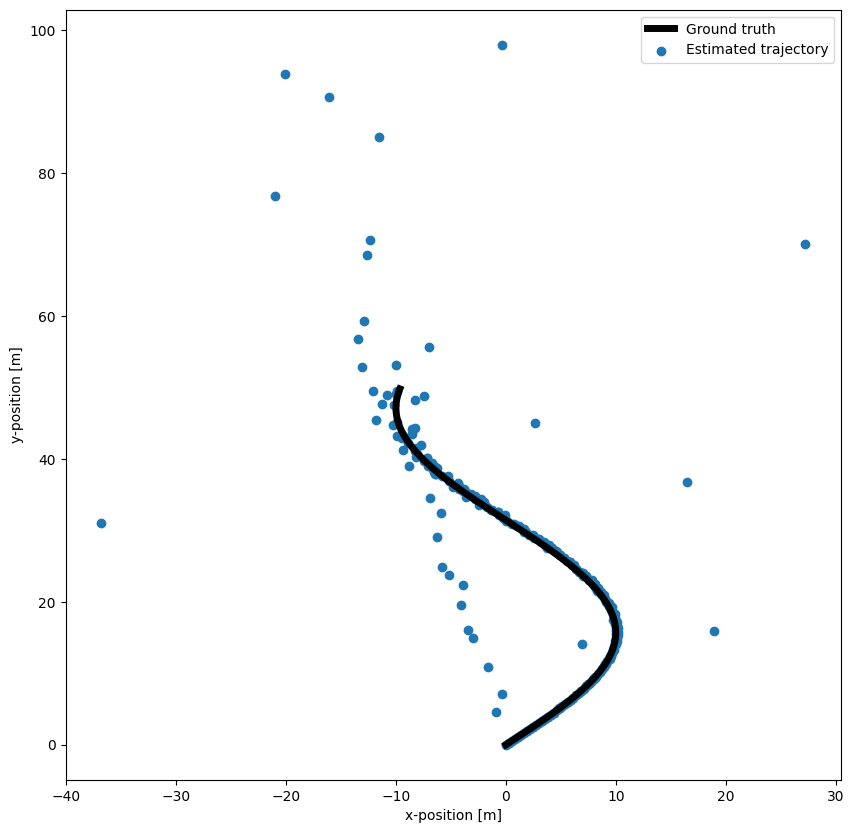

In [10]:
sim_data = sim.get_data() # Get data as: [CPI][TX][RX][CHIRP][ADC-SAMPLE]

sim.run_tracking(tracking_algorithm="maximum_value")

sim.plot()